In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.isnull().sum()
#no missing data, our data is ready to be precessed.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
del df['id'] #no useful information.
del df['date'] #no useful information if we want to predict the price, and we have year of built.
del df['sqft_above'] 
del df["sqft_basement"]
# deleted because sqft_living (=sqft_above+sqft_basement) is sufficient information.
del df['zipcode'] #not useful predicting price.
del df['lat']
del df['long']
del df['sqft_living15']
del df['sqft_lot15']
df.head()

KeyError: 'id'

In [5]:
"""
    To predict the price of a house, we usually look to the surface, number of rooms (bethrooms, bedrooms, ..),
    the condition of the house, & location, That's why i have chosen those columns.
"""

"\n    To predict the price of a house, we usually look to the surface, number of rooms (bethrooms, bedrooms, ..),\n    the condition of the house, & location, That's why i have chosen those columns.\n"

In [5]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Matplotlib is building the font cache; this may take a moment.


In [11]:
x=df[["sqft_lot"]]  
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [12]:
model=LinearRegression()
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 

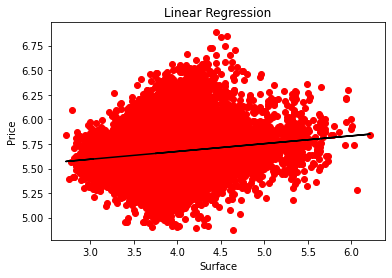

In [13]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Surface")
plt.plot(x,model.predict(x),color="k")
plt.show()

#outliers if deleted must rectify the resulted line of regression because most of houses are in the 

In [14]:
print("MSE score : ", mean_squared_error(y_test,predicted))
print("\nR squared score : ", metrics.r2_score(y_test,predicted))

MSE score :  0.050730041540472476

R squared score :  0.0199454874654329


In [10]:
import numpy as np

df["price"] = [np.log10(df["price"][i]) for i in range(len(df["price"]))]
df["sqft_lot"] = [np.log10(df["sqft_lot"][i]) for i in range(len(df["sqft_lot"]))]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
0,5.346157,3,1.00,1180,3.752048,1.0,0,0,3,7,1955,0
1,5.730782,3,2.25,2570,3.859859,2.0,0,0,3,7,1951,1991
2,5.255273,2,1.00,770,4.000000,1.0,0,0,3,6,1933,0
3,5.781037,4,3.00,1960,3.698970,1.0,0,0,5,7,1965,0
4,5.707570,3,2.00,1680,3.907411,1.0,0,0,3,8,1987,0


In [15]:
x1=df[["sqft_lot","condition"]]  
y1=df['price']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.35,random_state=40)

In [16]:
model1=LinearRegression() 
model1.fit(x1_train,y1_train) 
predicted=model1.predict(x1_test) 

In [17]:
print("MSE score : ", mean_squared_error(y1_test,predicted))
print("\nR squared score : ", metrics.r2_score(y1_test,predicted))

MSE score :  0.05065976382790818

R squared score :  0.021303183758157096


In [18]:
print("MSE score : ", mean_squared_error(y_test,predicted))
print("\nR squared score : ", metrics.r2_score(y_test,predicted))

MSE score :  0.05065976382790818

R squared score :  0.021303183758157096


In [ ]:
"""
    Multiple linear regresion is better than linear regression in this case.
"""

In [19]:
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

x1=df[["sqft_lot","condition"]]  
y1=df['price']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.35,random_state=40)

model2=LinearRegression() 
model2.fit(x1_train,y1_train) 
predicted=model1.predict(x1_test) 

poly=PolynomialFeatures(degree=3)

x1_train_fit = poly.fit_transform(x1_train) 
model2.fit(x1_train_fit, y1_train)
x_test_ = poly.fit_transform(x1_test)
predicted = model2.predict(x_test_)


In [20]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.04970701800234026
R squared:  0.03970929613836027


In [21]:
"""
    The better solution for predicting is using polynomial regression due to it's MSE score.
"""

"\n    The better solution for predicting is using polynomial regression due to it's MSE score.\n"